In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [3]:
# --- 1. Data Loading and Preprocessing ---
# This segment is about getting the data, handling missing values, and scaling it.

try:
    df = pd.read_csv('dataset.csv')
except FileNotFoundError:
    print("Error: The file was not found. Please check the file path.")
    exit()

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df[['MINIMUM_PAYMENTS']])
df['CREDIT_LIMIT'] = imputer.fit_transform(df[['CREDIT_LIMIT']])

# Drop the 'CUST_ID' column
df = df.drop('CUST_ID', axis=1)

# Scale the data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

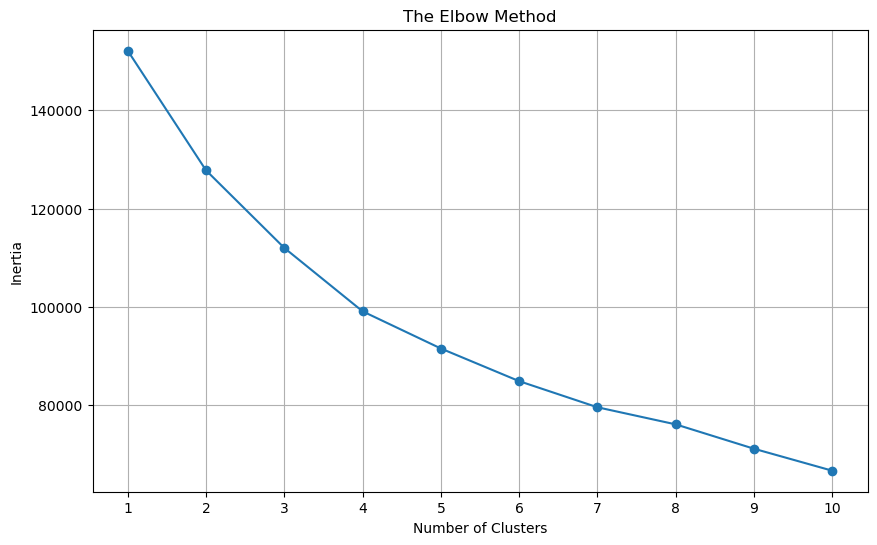

In [4]:
# --- 2. The Elbow Method ---
# This segment helps us find the best number of clusters (which we determined to be 4).

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [5]:
# --- 3. K-Means Clustering ---
# This is the main part where we group the customers.

kmeans_model = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_model.fit(df_scaled)
df['Cluster'] = kmeans_model.labels_

print("K-Means clustering has been applied and cluster labels have been added to the DataFrame.")


K-Means clustering has been applied and cluster labels have been added to the DataFrame.


In [6]:
# --- 4. Cluster Analysis ---
# This final segment helps us understand what each cluster means.

print("\nProfiling each cluster based on average values:")
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)


Profiling each cluster based on average values:
             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         894.907458           0.934734  1236.178934        593.974874   
1        3551.153761           0.986879  7681.620098       5095.878826   
2        4602.462714           0.968415   501.896219        320.373681   
3        1011.751528           0.789871   269.973466        209.853863   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    642.478274    210.570626             0.885165   
1                   2587.208264    653.638891             0.946418   
2                    181.607404   4520.724309             0.287731   
3                     60.386625    595.759339             0.170146   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster     